In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

df = pd.read_csv("iris.csv")
print("Shape of dataset:", df.shape)
display(df.head())

Shape of dataset: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# Preprocessing
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

X = df.drop("species", axis = 1 )
y = df["species"]

scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [15]:
# Modelling architecture
model = Sequential([
    Input(shape = (X_train.shape[1],)),
    Dense(10, activation = "relu"),
    Dense(8, activation = "relu"),
    Dense(3, activation = "softmax")
])

optimizer = Adam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Training model
history = model.fit(
    X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 8, verbose = 1
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5833 - loss: 0.8849 - val_accuracy: 0.8667 - val_loss: 0.6424
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8083 - loss: 0.5710 - val_accuracy: 0.9000 - val_loss: 0.3504
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8583 - loss: 0.3463 - val_accuracy: 0.9333 - val_loss: 0.2183
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9000 - loss: 0.2735 - val_accuracy: 0.9667 - val_loss: 0.1596
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9417 - loss: 0.2140 - val_accuracy: 1.0000 - val_loss: 0.1296
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9500 - loss: 0.1622 - val_accuracy: 1.0000 - val_loss: 0.1086
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9417 - loss: 0.1486 - val_accuracy: 0.9667 - val_loss: 0.0970
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9667 - loss: 0.1114 - val_accuracy: 1.0000 - val_los

In [17]:
# Evaluating performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9667 - loss: 0.0969
Test Accuracy: 0.967


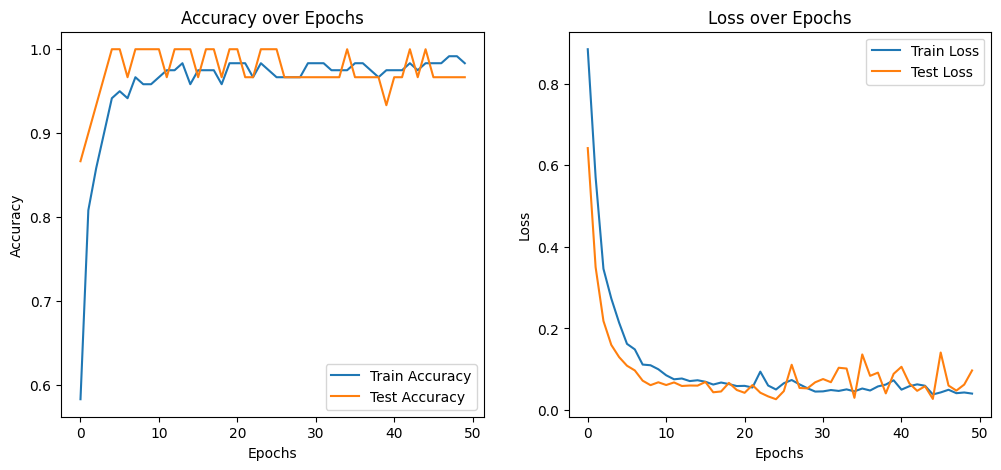

In [18]:
# Plotting accuracy and loss curves
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Test Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Test Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()